# Importações

In [1]:
import sys
sys.path.insert(1, '../predict_stock_mvp/pre_train/')
import load_data

import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Carregando Dados

In [2]:
save_predict = load_data.conect_data.load_table('../../data/data_processed/', 'processed.predict', 'csv', sep=None)

../predict_stock_mvp/pre_train\load_data.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(f'{location_table}/{name_table}.{type_table}', encoding=encoding, sep=sep)


In [3]:
money = load_data.conect_data.load_table('../../data/data_ingestion/', 'ingestion.itens_input_mvp', 'csv', sep=None)

# Criando Calculo de Receita das Previsões

In [4]:
money["DATA_DE_ENTRADA_DO_ITEM"] = money.DATA_DE_ENTRADA_DO_ITEM.apply(lambda linha: datetime.strptime(linha, '%Y-%m-%d').date())

In [5]:
valores = []

for item in money.NUMERO_REGISTRO_PRODUTO.unique():
    frame = money.query(f"NUMERO_REGISTRO_PRODUTO == {item}")
    value = frame[frame.DATA_DE_PEDIDO_DO_ITEM == frame.DATA_DE_PEDIDO_DO_ITEM.max()].CUSTO_DE_AQUISICAO
    valores.append([item,value.iloc[0],frame.DATA_DE_PEDIDO_DO_ITEM.max()])

valores = pd.DataFrame(valores, columns=['NUMERO_REGISTRO_PRODUTO', 'VALORES', 'DATA_REFERENCIA'])

In [6]:
valores

,NUMERO_REGISTRO_PRODUTO,VALORES,DATA_REFERENCIA
0,5,215,2021-10-04
1,111,34,2021-10-08
2,100020016,106,2021-10-20
3,100020069,195,2021-08-05
4,100020086,127,2021-11-17
...,...,...,...
2995,198110001,195,2021-07-06
2996,198600006,195,2021-10-06
2997,198600011,257,2021-07-29
2998,198600012,140,2021-10-12


In [7]:
predicoes = save_predict[["NUMERO_REGISTRO_PRODUTO","DATA_DE_CONSUMO","QUANTIDADE_SAIDA","PREDICAO_MEDIA_MOVEL","PREDICAO_DEEPAR"]]

In [8]:
print(valores.shape)
print(predicoes.shape)

(3000, 3)
(72000, 5)


In [9]:
merge = pd.merge(predicoes,valores,how='left',on='NUMERO_REGISTRO_PRODUTO')

In [10]:
print(valores.shape)
print(predicoes.shape)
print(merge.shape)

(3000, 3)
(72000, 5)
(72000, 7)


In [11]:
merge.query("NUMERO_REGISTRO_PRODUTO == 5")

,NUMERO_REGISTRO_PRODUTO,DATA_DE_CONSUMO,QUANTIDADE_SAIDA,PREDICAO_MEDIA_MOVEL,PREDICAO_DEEPAR,VALORES,DATA_REFERENCIA
0,5,2020-02-29,16,NaN,NaN,215,2021-10-04
1,5,2020-03-31,50,NaN,NaN,215,2021-10-04
2,5,2020-04-30,4,NaN,NaN,215,2021-10-04
3,5,2020-05-31,17,23.333333,NaN,215,2021-10-04
4,5,2020-06-30,6,23.666667,NaN,215,2021-10-04
5,5,2020-07-31,1,9.000000,NaN,215,2021-10-04
6,5,2020-08-31,19,8.000000,NaN,215,2021-10-04
7,5,2020-09-30,37,8.666667,NaN,215,2021-10-04
8,5,2020-10-31,7,19.000000,NaN,215,2021-10-04
9,5,2020-11-30,62,21.000000,NaN,215,2021-10-04


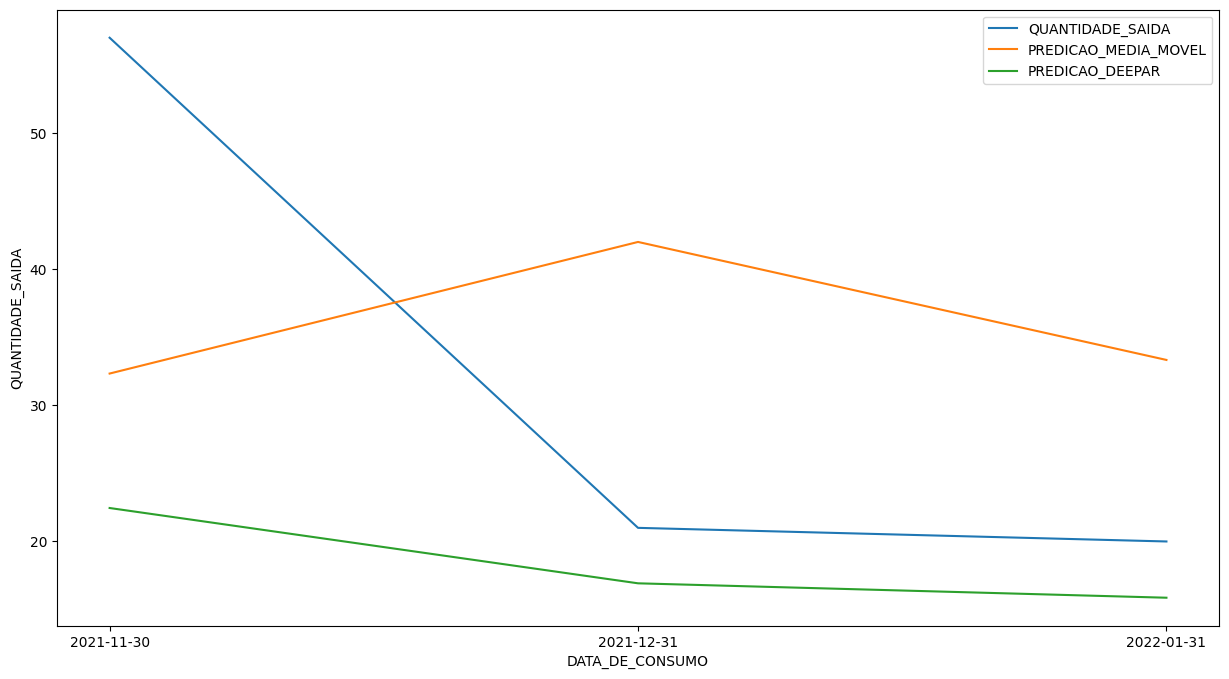

In [12]:
fig, axes = plt.subplots(figsize=(15, 8))

sns.lineplot(x="DATA_DE_CONSUMO", y="QUANTIDADE_SAIDA", estimator=np.median, data=merge.query("DATA_DE_CONSUMO >= '2021-11-30' and NUMERO_REGISTRO_PRODUTO == 5"))
sns.lineplot(x="DATA_DE_CONSUMO", y="PREDICAO_MEDIA_MOVEL", estimator=np.median, data=merge.query("DATA_DE_CONSUMO >= '2021-11-30' and NUMERO_REGISTRO_PRODUTO == 5"))
sns.lineplot(x="DATA_DE_CONSUMO", y="PREDICAO_DEEPAR", estimator=np.median, data=merge.query("DATA_DE_CONSUMO >= '2021-11-30' and NUMERO_REGISTRO_PRODUTO == 5"))

plt.legend(labels=["QUANTIDADE_SAIDA","PREDICAO_MEDIA_MOVEL","PREDICAO_DEEPAR"])

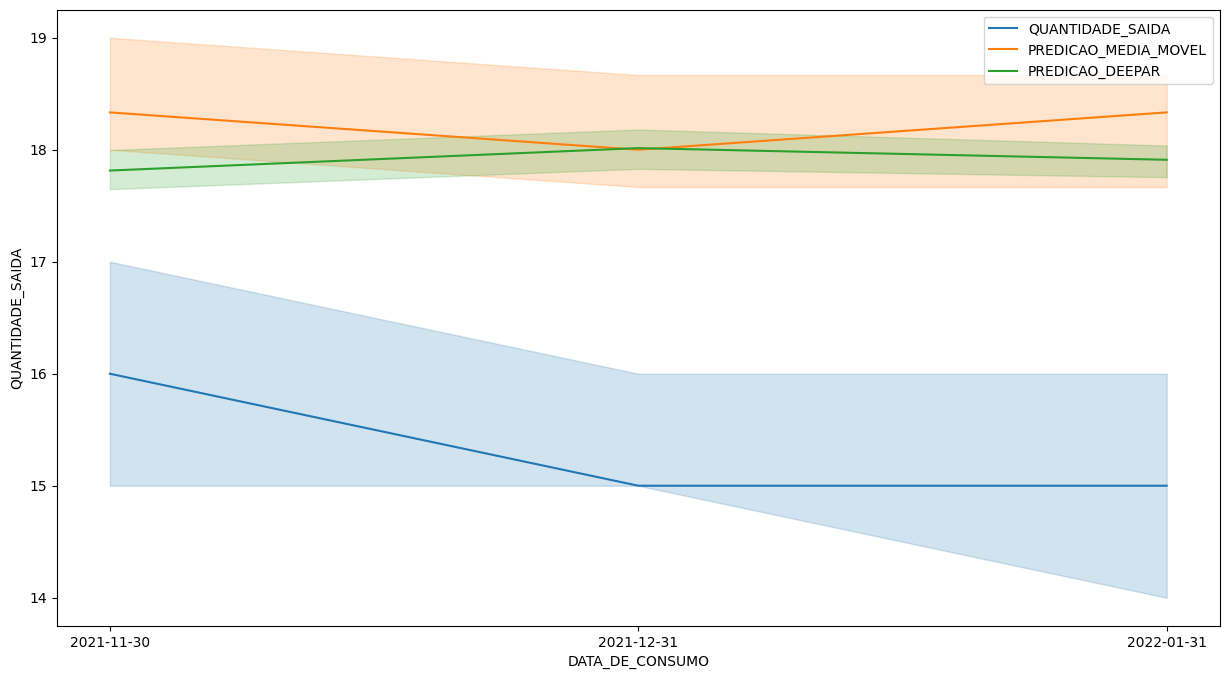

In [13]:
fig, axes = plt.subplots(figsize=(15, 8))

sns.lineplot(x="DATA_DE_CONSUMO", y="QUANTIDADE_SAIDA", estimator=np.median, data=merge.query("DATA_DE_CONSUMO >= '2021-11-30'"))
sns.lineplot(x="DATA_DE_CONSUMO", y="PREDICAO_MEDIA_MOVEL", estimator=np.median, data=merge.query("DATA_DE_CONSUMO >= '2021-11-30'"))
sns.lineplot(x="DATA_DE_CONSUMO", y="PREDICAO_DEEPAR", estimator=np.median, data=merge.query("DATA_DE_CONSUMO >= '2021-11-30'"))

plt.legend(labels=["QUANTIDADE_SAIDA","PREDICAO_MEDIA_MOVEL","PREDICAO_DEEPAR"])

In [14]:
merge["PREDICAO_MEDIA_MOVEL"] = merge.PREDICAO_MEDIA_MOVEL.fillna(-9999999999).apply(int)
merge["PREDICAO_DEEPAR"] = merge.PREDICAO_DEEPAR.fillna(-9999999999).apply(int)

receita = []
for idx,linha in merge.iterrows():
    
    if linha.PREDICAO_MEDIA_MOVEL < 0:
        receita_media_movel = 0
    else:
        receita_media_movel = linha.PREDICAO_MEDIA_MOVEL * linha.VALORES
    
    if linha.PREDICAO_DEEPAR < 0:
        receita_deepAR = 0
    else:
        receita_deepAR = linha.PREDICAO_DEEPAR * linha.VALORES
    
    receita.append([linha.NUMERO_REGISTRO_PRODUTO,linha.DATA_DE_CONSUMO,receita_media_movel,receita_deepAR])

In [15]:
receita_calculada = pd.DataFrame(receita, columns=['NUMERO_REGISTRO_PRODUTO','DATA_DE_CONSUMO','RECEITA_MEDIA_MOVEL','RECEITA_DEEPAR'])

In [16]:
print(receita_calculada.shape)
print(merge.shape)

(72000, 4)
(72000, 7)


In [17]:
merge_1 = pd.merge(merge,receita_calculada,how='left',on=['NUMERO_REGISTRO_PRODUTO','DATA_DE_CONSUMO'])

In [18]:
print(receita_calculada.shape)
print(merge.shape)
print(merge_1.shape)

(72000, 4)
(72000, 7)
(72000, 9)


In [19]:
merge_1[(merge_1.DATA_DE_CONSUMO >= '2021-11-30') & (merge_1.DATA_DE_CONSUMO <= '2021-11-31')][["RECEITA_MEDIA_MOVEL","RECEITA_DEEPAR"]].sum()

RECEITA_MEDIA_MOVEL    8915331
RECEITA_DEEPAR         8161841
dtype: int64

In [20]:
merge_1[(merge_1.DATA_DE_CONSUMO >= '2021-12-30') & (merge_1.DATA_DE_CONSUMO <= '2021-12-31')][["RECEITA_MEDIA_MOVEL","RECEITA_DEEPAR"]].sum()

RECEITA_MEDIA_MOVEL    8949795
RECEITA_DEEPAR         8241566
dtype: int64

In [21]:
merge_1[(merge_1.DATA_DE_CONSUMO >= '2022-01-31') & (merge_1.DATA_DE_CONSUMO <= '2022-01-31')][["RECEITA_MEDIA_MOVEL","RECEITA_DEEPAR"]].sum()

RECEITA_MEDIA_MOVEL    8912638
RECEITA_DEEPAR         8216162
dtype: int64

In [22]:
merge_1[merge_1.DATA_DE_CONSUMO >= '2021-11-30'].groupby(["NUMERO_REGISTRO_PRODUTO"])[["RECEITA_MEDIA_MOVEL","RECEITA_DEEPAR"]].sum().sum()

RECEITA_MEDIA_MOVEL    26777764
RECEITA_DEEPAR         24619569
dtype: int64

In [23]:
merge_1[merge_1.DATA_DE_CONSUMO >= '2021-11-30'].groupby(["NUMERO_REGISTRO_PRODUTO"])[["RECEITA_MEDIA_MOVEL","RECEITA_DEEPAR"]].sum().sum()[-1] / merge_1[merge_1.DATA_DE_CONSUMO >= '2021-11-30'].groupby(["NUMERO_REGISTRO_PRODUTO"])[["RECEITA_MEDIA_MOVEL","RECEITA_DEEPAR"]].sum().sum()[0]

0.9194034647553097

In [24]:
(merge_1[merge_1.DATA_DE_CONSUMO >= '2021-11-30'].PREDICAO_MEDIA_MOVEL > merge_1[merge_1.DATA_DE_CONSUMO >= '2021-11-30'].PREDICAO_DEEPAR).sum() / len(merge_1[merge_1.DATA_DE_CONSUMO >= '2021-10-31'])

0.38408333333333333

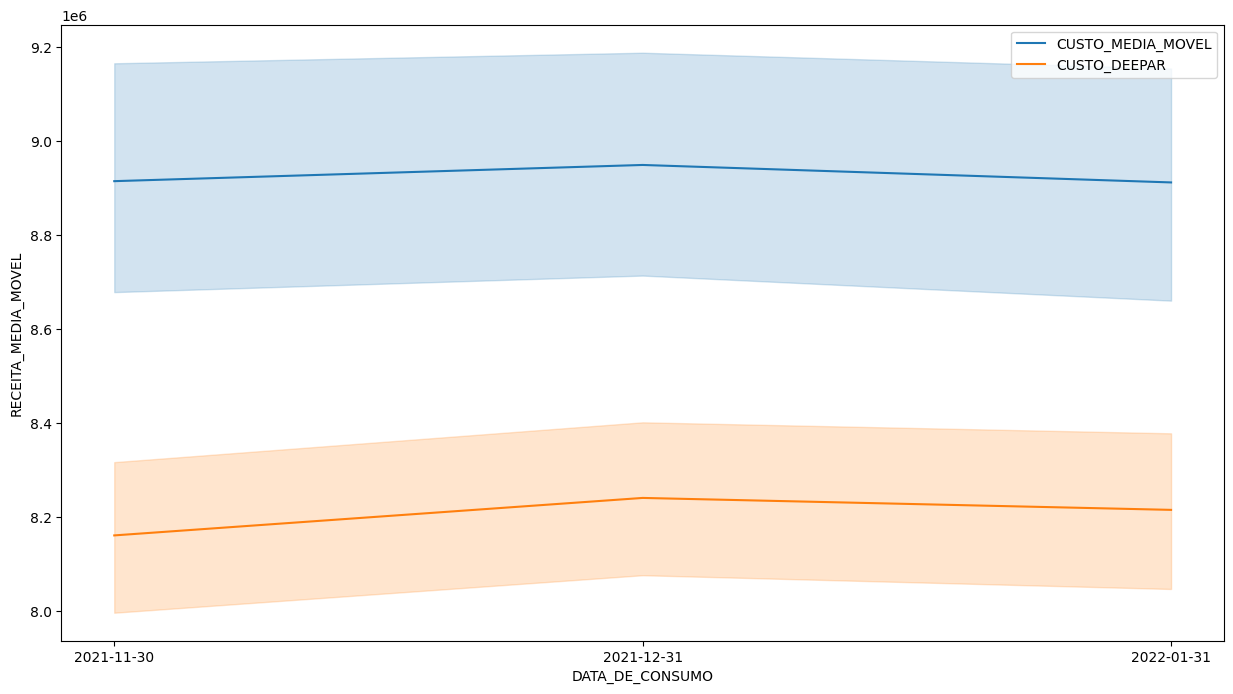

In [25]:
fig, axes = plt.subplots(figsize=(15, 8))
sns.lineplot(x="DATA_DE_CONSUMO", y="RECEITA_MEDIA_MOVEL", estimator=np.sum, data=merge_1.query("DATA_DE_CONSUMO >= '2021-11-30'"))
sns.lineplot(x="DATA_DE_CONSUMO", y="RECEITA_DEEPAR", estimator=np.sum, data=merge_1.query("DATA_DE_CONSUMO >= '2021-11-30'"))

plt.legend(labels=["CUSTO_MEDIA_MOVEL","CUSTO_DEEPAR"])

In [26]:
merge_1.query("DATA_DE_CONSUMO >= '2021-11-30'").RECEITA_MEDIA_MOVEL.sum()

26777764

In [27]:
merge_1.query("DATA_DE_CONSUMO >= '2021-11-30'").RECEITA_DEEPAR.sum()

25030707

# Criando Classe para Calcular Receita de Previsões

In [4]:
class revenue:
    
    def calcule_revenue (data_predict=load_data.conect_data.load_table('../../data/data_processed/', 'processed.predict', 'csv', sep=None), data_value=load_data.conect_data.load_table('../../data/data_ingestion/', 'ingestion.itens_input_mvp', 'csv', sep=None)):
        valores = []

        for item in data_value.NUMERO_REGISTRO_PRODUTO.unique():
            frame = data_value.query(f"NUMERO_REGISTRO_PRODUTO == {item}")
            value = frame[frame.DATA_DE_PEDIDO_DO_ITEM == frame.DATA_DE_PEDIDO_DO_ITEM.max()].CUSTO_DE_AQUISICAO
            valores.append([item,value.iloc[0],frame.DATA_DE_PEDIDO_DO_ITEM.max()])

        valores = pd.DataFrame(valores, columns=['NUMERO_REGISTRO_PRODUTO', 'VALORES', 'DATA_REFERENCIA'])
        
        predicoes = data_predict[["NUMERO_REGISTRO_PRODUTO","DATA_DE_CONSUMO","QUANTIDADE_SAIDA","PREDICAO_MEDIA_MOVEL","PREDICAO_DEEPAR"]]
        
        merge = pd.merge(predicoes,valores,how='left',on='NUMERO_REGISTRO_PRODUTO')
        
        merge["PREDICAO_MEDIA_MOVEL"] = merge.PREDICAO_MEDIA_MOVEL.fillna(-9999999999).apply(int)
        merge["PREDICAO_DEEPAR"] = merge.PREDICAO_DEEPAR.fillna(-9999999999).apply(int)

        receita = []
        for idx,linha in merge.iterrows():

            if linha.PREDICAO_MEDIA_MOVEL < 0:
                receita_media_movel = 0
            else:
                receita_media_movel = linha.PREDICAO_MEDIA_MOVEL * linha.VALORES

            if linha.PREDICAO_DEEPAR < 0:
                receita_deepAR = 0
            else:
                receita_deepAR = linha.PREDICAO_DEEPAR * linha.VALORES

            receita.append([linha.NUMERO_REGISTRO_PRODUTO,linha.DATA_DE_CONSUMO,receita_media_movel,receita_deepAR])
        receita_calculada = pd.DataFrame(receita, columns=['NUMERO_REGISTRO_PRODUTO','DATA_DE_CONSUMO','RECEITA_MEDIA_MOVEL','RECEITA_DEEPAR'])
        
        merge_1 = pd.merge(merge,receita_calculada,how='left',on=['NUMERO_REGISTRO_PRODUTO','DATA_DE_CONSUMO'])
        return merge_1

In [7]:
merge_1 = revenue.calcule_revenue()

In [8]:
merge_1

,NUMERO_REGISTRO_PRODUTO,DATA_DE_CONSUMO,QUANTIDADE_SAIDA,PREDICAO_MEDIA_MOVEL,PREDICAO_DEEPAR,VALORES,DATA_REFERENCIA,RECEITA_MEDIA_MOVEL,RECEITA_DEEPAR
0,10277002,2020-02-29,21,-9999999999,-9999999999,3611,2021-08-24,0,0
1,10277002,2020-03-31,18,-9999999999,-9999999999,3611,2021-08-24,0,0
2,10277002,2020-04-30,56,-9999999999,-9999999999,3611,2021-08-24,0,0
3,10277002,2020-05-31,0,31,-9999999999,3611,2021-08-24,111941,0
4,10277002,2020-06-30,21,24,-9999999999,3611,2021-08-24,86664,0
...,...,...,...,...,...,...,...,...,...
47995,996640035,2021-09-30,81,10,-9999999999,827,2021-11-14,8270,0
47996,996640035,2021-10-31,21,36,-9999999999,827,2021-11-14,29772,0
47997,996640035,2021-11-30,21,35,25,827,2021-11-14,28945,20675
47998,996640035,2021-12-31,0,41,20,827,2021-11-14,33907,16540


In [9]:
merge_1[(merge_1.DATA_DE_CONSUMO >= '2021-11-30') & (merge_1.DATA_DE_CONSUMO <= '2021-11-31')][["RECEITA_MEDIA_MOVEL","RECEITA_DEEPAR"]].sum()

RECEITA_MEDIA_MOVEL    99575329
RECEITA_DEEPAR         88601497
dtype: int64